<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


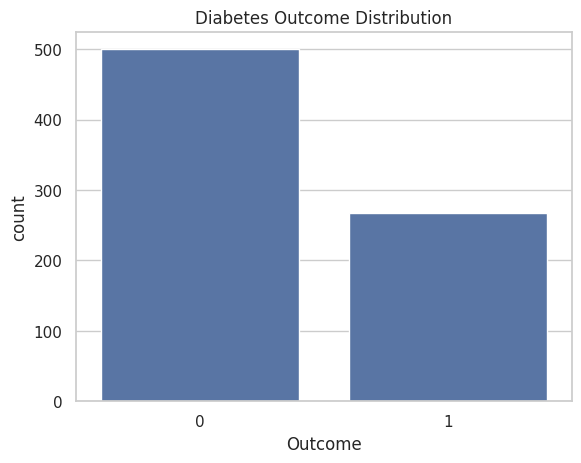

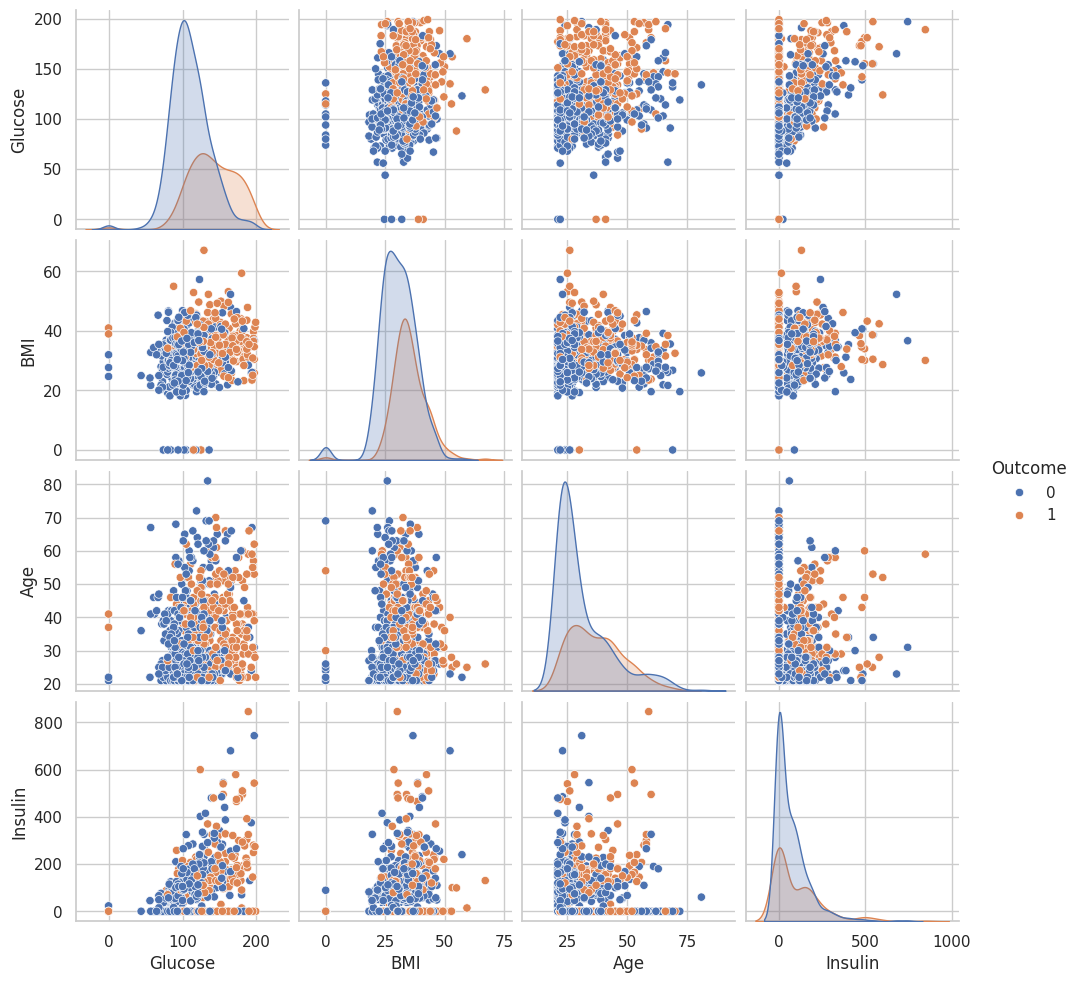

Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros
🔍 Random Forest Results
Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



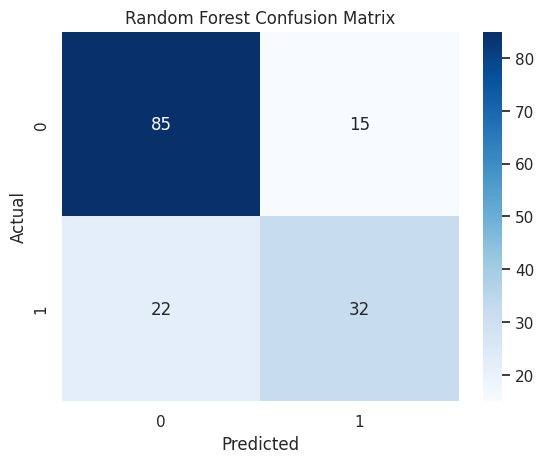

🔍 Logistic Regression Results
Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



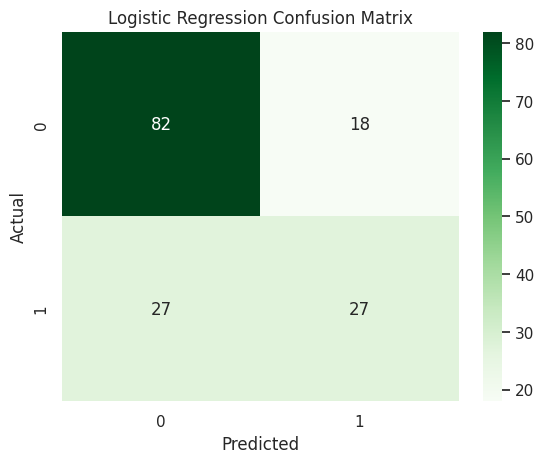

In [ ]:
# STEP 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Styling
sns.set(style="whitegrid")

# STEP 2: Load Data
df = pd.read_csv("diabetes.csv")
df.head()

# Check dataset info and summary
df.info()
df.describe()
df.isnull().sum()

# Check class distribution
sns.countplot(data=df, x='Outcome')
plt.title("Diabetes Outcome Distribution")
plt.show()

# Pairplot of some important features
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome')
plt.show()

# Check how many zeros exist in columns where 0 is not a valid value
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_invalid_zeros:
    print(f"{col} has {(df[col] == 0).sum()} zeros")

# Replace zeros with median in selected columns
for col in cols_with_invalid_zeros:
    df[col] = df[col].replace(0, df[col].median())

# Split into features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

# Evaluation
print("🔍 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rfc_preds))
print("\nClassification Report:\n", classification_report(y_test, rfc_preds))
sns.heatmap(confusion_matrix(y_test, rfc_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# Evaluation
print("🔍 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, logreg_preds))
print("\nClassification Report:\n", classification_report(y_test, logreg_preds))
sns.heatmap(confusion_matrix(y_test, logreg_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
